In [24]:
%matplotlib inline

In [1]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.loadtxt('/home/bk/Desktop/nirssignal.TXT', delimiter = '\t', skiprows = 36)

In [3]:
print(data)
data.shape
dd = np.transpose(data)
dd.shape

[[ 4.200000e-01  0.000000e+00  0.000000e+00 ... -5.076700e-02
   4.067100e-02 -1.009600e-02]
 [ 4.320000e-01  0.000000e+00  0.000000e+00 ... -2.486200e-02
   1.424900e-02 -1.061300e-02]
 [ 4.440000e-01  0.000000e+00  0.000000e+00 ...  1.752000e-02
  -2.246100e-02 -4.941000e-03]
 ...
 [ 1.231008e+03  0.000000e+00  0.000000e+00 ...  6.675000e-03
  -4.569000e-03  2.106000e-03]
 [ 1.231020e+03  0.000000e+00  0.000000e+00 ...  1.835100e-02
  -2.214600e-02 -3.795000e-03]
 [ 1.231032e+03  0.000000e+00  0.000000e+00 ... -8.797000e-03
   1.412300e-02  5.326000e-03]]


(13, 102552)

In [4]:
d = pd.read_csv('/home/bk/Desktop/nirssignal.TXT', sep = '\t', engine='python', encoding = 'cp949')

In [5]:
d.head()

,Time(sec),Task,Mark,Count,oxyHb,deoxyHb,totalHb,oxyHb .1,deoxyHb.1,totalHb.1,oxyHb .2,deoxyHb.2,totalHb.2
0,0.000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012,0,0,0,-0.056737,0.023237,-0.033500,-0.063327,0.036452,-0.026875,0.032553,-0.021254,0.011299
2,0.024,0,0,0,-0.032632,0.046485,0.013853,-0.019887,0.021371,0.001483,0.023636,-0.020690,0.002946
3,0.036,0,0,0,-0.075445,0.066066,-0.009379,-0.034557,0.018346,-0.016211,-0.016702,0.025702,0.009001
4,0.048,0,0,0,-0.038511,0.039136,0.000626,-0.038782,0.032459,-0.006323,-0.003822,0.019297,0.015474


In [6]:
df_sample = d.loc[:, :]

In [7]:
df_sample.columns = ['time', 'task', 'mark', 'count', 'oxy1', 'deoxy1', 'total1', 'oxy2', 'deoxy2', 'total2', 'oxy3', 'deoxy3', 'total3']

In [8]:
df_sample.head()

,time,task,mark,count,oxy1,deoxy1,total1,oxy2,deoxy2,total2,oxy3,deoxy3,total3
0,0.000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012,0,0,0,-0.056737,0.023237,-0.033500,-0.063327,0.036452,-0.026875,0.032553,-0.021254,0.011299
2,0.024,0,0,0,-0.032632,0.046485,0.013853,-0.019887,0.021371,0.001483,0.023636,-0.020690,0.002946
3,0.036,0,0,0,-0.075445,0.066066,-0.009379,-0.034557,0.018346,-0.016211,-0.016702,0.025702,0.009001
4,0.048,0,0,0,-0.038511,0.039136,0.000626,-0.038782,0.032459,-0.006323,-0.003822,0.019297,0.015474


In [9]:
df_sample.isnull().sum()

time      0
task      0
mark      0
count     0
oxy1      0
deoxy1    0
total1    0
oxy2      0
deoxy2    0
total2    0
oxy3      0
deoxy3    0
total3    0
dtype: int64

In [10]:
ex_data = df_sample.drop(['time', 'mark', 'count', 'total1', 'total2', 'total3'], axis = 1)

In [11]:
ex_data.head()

,task,oxy1,deoxy1,oxy2,deoxy2,oxy3,deoxy3
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,-0.056737,0.023237,-0.063327,0.036452,0.032553,-0.021254
2,0,-0.032632,0.046485,-0.019887,0.021371,0.023636,-0.020690
3,0,-0.075445,0.066066,-0.034557,0.018346,-0.016702,0.025702
4,0,-0.038511,0.039136,-0.038782,0.032459,-0.003822,0.019297


In [12]:
ex_data = ex_data[['oxy1', 'deoxy1', 'oxy2', 'deoxy2', 'oxy3', 'deoxy3', 'task']]
ex_data.head()

,oxy1,deoxy1,oxy2,deoxy2,oxy3,deoxy3,task
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-0.056737,0.023237,-0.063327,0.036452,0.032553,-0.021254,0
2,-0.032632,0.046485,-0.019887,0.021371,0.023636,-0.020690,0
3,-0.075445,0.066066,-0.034557,0.018346,-0.016702,0.025702,0
4,-0.038511,0.039136,-0.038782,0.032459,-0.003822,0.019297,0


In [13]:
idx = ex_data.index[ex_data['task']==4]
print(idx)

Int64Index([52580, 57583, 62575, 67579, 72574, 77578, 82583, 87575, 92580,
            97581],
           dtype='int64')


In [14]:
ex_data.values[1,2]

-0.063327

In [15]:
raw_ndarray = ex_data.values
raw_ndarray.shape

(102587, 7)

In [16]:
raw_ndarray = np.transpose(ex_data.values)
raw_ndarray.shape

(7, 102587)

In [17]:
raw_ndarray.shape

raw_ndarray[0][:]

array([ 0.      , -0.056737, -0.032632, ..., -0.066908, -0.022122,
       -0.065152])

In [206]:
#raw_ndarray = np.load('/home/bk/Desktop/mne-python-fnirs-master/raw_ndarray.npy')

In [218]:
#print(raw_ndarray)
#raw_ndarray.shape

[[-1.70111359e-06 -1.72669562e-06 -1.72795997e-06 ...  1.39882494e-06
   1.43378500e-06  1.48225100e-06]
 [-1.82848782e-06 -1.84070972e-06 -1.83736029e-06 ... -1.74472229e-07
  -1.70030046e-07 -1.65045404e-07]
 [ 2.84014096e-06  2.80337187e-06  2.77815710e-06 ... -3.29526962e-06
  -3.28354148e-06 -3.25336845e-06]
 ...
 [ 6.60634346e-07  6.65208778e-07  6.57068197e-07 ... -8.71994778e-07
  -8.70736054e-07 -8.77483785e-07]
 [-7.96700475e-07 -8.01013261e-07 -8.04658971e-07 ...  5.94653453e-07
   5.91101173e-07  5.87585097e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


(41, 11146)

In [18]:
# Create_info
nChannels = 3 # number of physical channels
sampling_frequency = 83.3

channel_names_fnirs = ['HbO '+"%.2d" % i for i in range(1,nChannels+1)] + ['HbR '+"%.2d" % i for i in range(1,nChannels+1)]
channel_names = channel_names_fnirs + ['Events']

channel_types = ['hbo' for i in range(nChannels)] + ['hbr' for i in range(nChannels)] + ['stim']

info = mne.create_info(ch_names=channel_names, sfreq=sampling_frequency, ch_types=channel_types, montage=None)
info['lowpass'] = 0.1
info['highpass'] = 0.1

# Import fNIRS data
raw_data = mne.io.RawArray(data=raw_ndarray, info=info, first_samp=0, verbose=None)

Creating RawArray with float64 data, n_channels=7, n_times=102587
    Range : 0 ... 102586 =      0.000 ...  1231.525 secs
Ready.


In [19]:
print(channel_names_fnirs)
print(channel_types)
info

['HbO 01', 'HbO 02', 'HbO 03', 'HbR 01', 'HbR 02', 'HbR 03']
['hbo', 'hbo', 'hbo', 'hbr', 'hbr', 'hbr', 'stim']


<Info | 7 non-empty values
 bads: []
 ch_names: HbO 01, HbO 02, HbO 03, HbR 01, HbR 02, HbR 03, Events
 chs: 3 HBO, 3 HBR, 1 STIM
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 0.1 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 83.3 Hz
>

In [20]:
raw_data

<RawArray | 7 x 102587 (1231.5 s), ~5.5 MB, data loaded>

23 events found
Event IDs: [1 2 3 4]


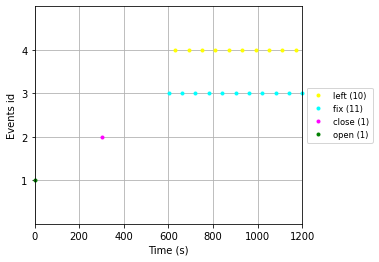

In [21]:
# Events   
events = mne.find_events(raw_data, stim_channel='Events', shortest_event=1)
event_id = {'open': 1, 'close': 2, 'fix' : 3, 'left' : 4}
color = {1:'green', 2:'magenta', 3:'cyan', 4:'yellow'}
fig = mne.viz.plot_events(events, raw_data.info['sfreq'], raw_data.first_samp, color=color, event_id=event_id)

In [85]:
# Bandpass filter raw data
l_freq = 0.01 # high-pass filter cutoff ( __/¯¯¯ )
h_freq = 0.1  #  low-pass filter cutoff ( ¯¯¯\__ )
    
raw_data.filter(l_freq, h_freq)

tmp_data = raw_data.get_data()
np.max(np.abs(tmp_data))



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 27489 samples (330.000 sec)



4.0

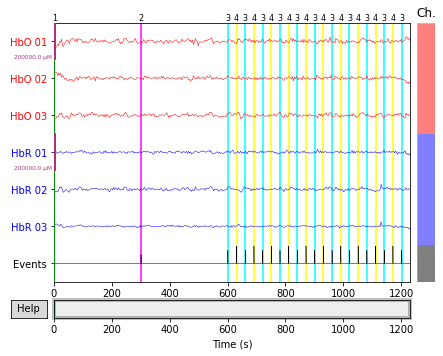

In [86]:
scalings = dict(hbo=1e-1, hbr=1e-1, stim=1)
fig_title = 'fNIRS Raw Bandpass filtered [' + str(l_freq) + ' Hz, ' + str(h_freq) + ' Hz]'
plot_colors = dict(hbo='r', hbr='b', stim='k')
fig = raw_data.plot(title=fig_title, events=events, start=0.0, color=plot_colors, event_color=color, 
                    duration=np.max(raw_data.times), scalings=scalings, order=None, n_channels=len(channel_names), remove_dc=False, highpass=None, lowpass=None)

In [87]:
xx = raw_data.get_data()
xx[0][:]

array([-4.33680869e-18, -1.80678269e-03, -3.60997119e-03, ...,
        1.51559993e-03,  7.58756668e-04,  1.20617492e-18])

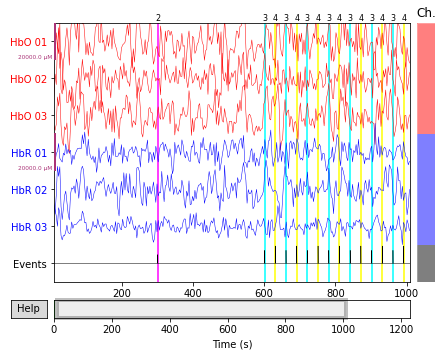

In [103]:
# Plot Raw data (default)
scalings = dict(hbo=10e-3, hbr=10e-3, stim=1)
fig_title = 'fNIRS Raw Bandpass filtered [' + str(l_freq) + ' Hz, ' + str(h_freq) + ' Hz]'
plot_colors = dict(hbo='r', hbr='b', stim='k')
fig = raw_data.plot(title=fig_title, events=events, start=10.0, color=plot_colors, event_color=color, 
                    scalings=scalings, order=None, duration=1000, 
                    remove_dc=False, highpass=None, lowpass=None)

In [89]:
print(events)
print(event_id)

[[    75      0      1]
 [ 25082      0      2]
 [ 50077      0      3]
 [ 52580      0      4]
 [ 55082      0      3]
 [ 57583      0      4]
 [ 60084      0      3]
 [ 62575      0      4]
 [ 65077      0      3]
 [ 67579      0      4]
 [ 70083      0      3]
 [ 72574      0      4]
 [ 75078      0      3]
 [ 77578      0      4]
 [ 80079      0      3]
 [ 82583      0      4]
 [ 85074      0      3]
 [ 87575      0      4]
 [ 90078      0      3]
 [ 92580      0      4]
 [ 95079      0      3]
 [ 97581      0      4]
 [100076      0      3]]
{'open': 1, 'close': 2, 'fix': 3, 'left': 4}


23 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 23 events and 1001 original time points ...
1 bad epochs dropped


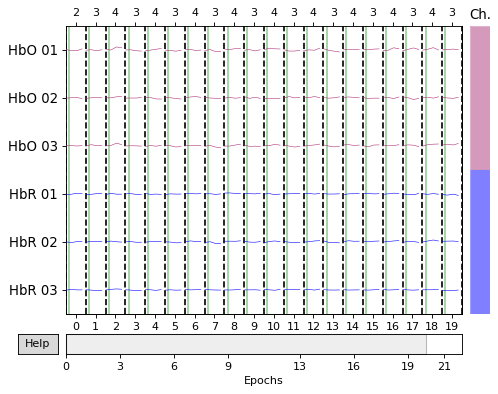

In [90]:
#%% Epochs
tmin = -2
tmax = 10
reject = dict(hbo=1, hbr=1)
scalings = dict(hbo=1e-1, hbr=1e-1, stim=1)

epochs = mne.Epochs(raw_data, events, event_id, tmin, tmax, proj=True, baseline=(None, 0), preload=True, reject=reject)    

fig_title = 'fNIRS Epochs'
fig = epochs.plot(title=fig_title, scalings=scalings)

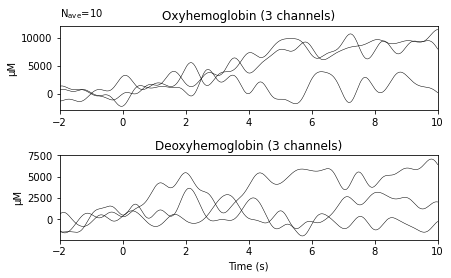

In [91]:
evoked_1 = epochs['left'].average()
fig = evoked_1.plot()

10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


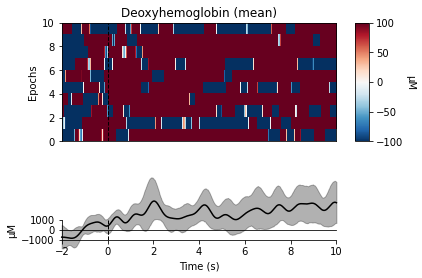

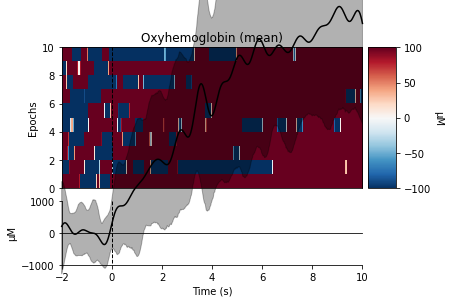

[<Figure size 432x288 with 3 Axes>, <Figure size 432x288 with 3 Axes>]

In [100]:
epochs['left'].plot_image(combine='mean', vmin=-100, vmax=100,
                             ts_args=dict(ylim=dict(hbo=[-1000, 1000],
                                                    hbr=[-1000, 1000])))

23 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 23 events and 188 original time points ...
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoch based on HBO : ['HbO 01', 'HbO 02', 'HbO 03']
    Rejecting  epoc

ZeroDivisionError: float division by zero